<a href="https://colab.research.google.com/github/rajeshpahari/ML/blob/main/006_Q_Q_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q-Q Plot:Quantile quantile Plot

Basically how raw data is lying on theoratical gaussian distribution: a plot of raw VS theoritically gaussian distibuted data

Why its called quantile -quantile data: Lack of comptaion availibbility first used to draw this data only in IQR data.

In [41]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

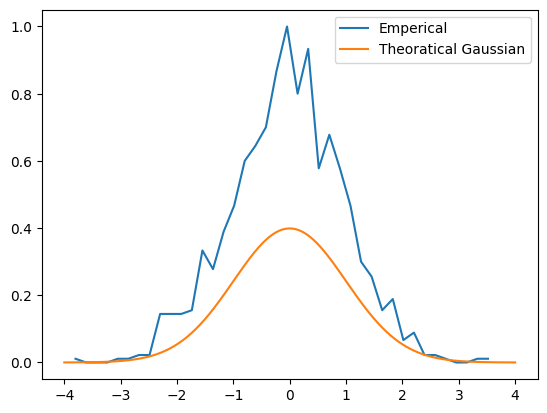

In [47]:
####Raw data

#Generate Data
n=1000
data=np.random.randn(n)



# find histogram data points
yy,xx=np.histogram(data,bins=40)
#Scale yy for Vizualization
yy=yy/max(yy)
xx=(xx[1:]+xx[:-1])/2
#Plot Raw data
plt.plot(xx,yy,label='Emperical')

####Theoratical normal distribution
theodata=np.linspace(-4,4,10001)
theonorm=stats.norm.pdf(theodata)
#Lets scale for vizualization
thenorm=theonorm/max(theonorm)

plt.plot(theodata,theonorm,label='Theoratical Gaussian')
plt.legend()
plt.show()


# Create a Q-Q plot

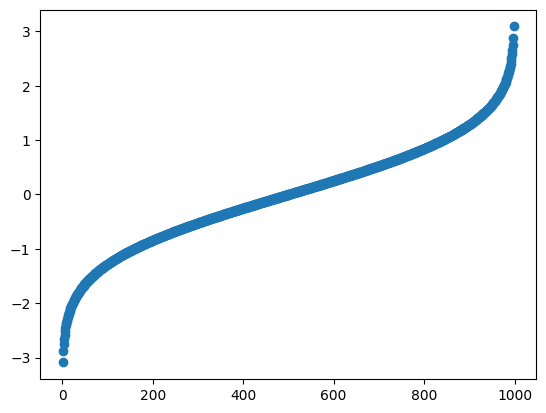

In [43]:
# QQ plot is teory Vs Reality

#Lets find out zscore of our raw data- zscore is a normalization operations
z_score_sorted=np.sort(stats.zscore(data))
#Find a normal distribution within 0 to 1 with n sample
sort_normal=stats.norm.ppf(np.linspace(0,1,n))

#plt.plot(z_score_sorted,'o')
plt.plot(sort_normal,'o');

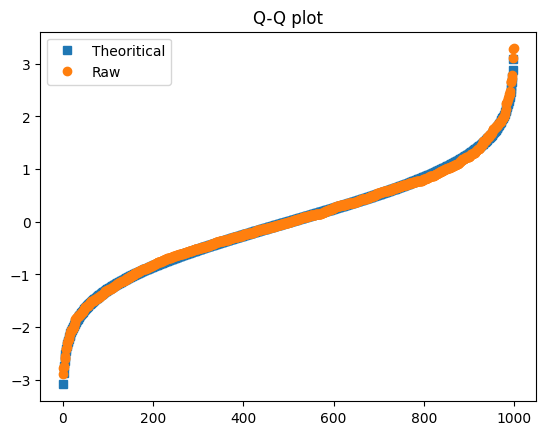

In [44]:
plt.plot(sort_normal,'s',label='Theoritical')
plt.plot(z_score_sorted,'o',label='Raw')
plt.legend()
plt.title('Q-Q plot')
plt.show()

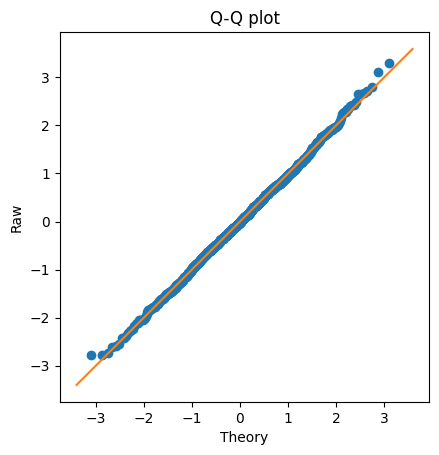

In [45]:
#Lets Improve visualization to draw a redline

plt.plot(sort_normal,z_score_sorted,'o')

XL,XR=plt.xlim()
YL,YR=plt.ylim()
lims=[np.min([XL,XR,YL,YR]),np.max([XL,XR,YL,YR])]

plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims,lims)
plt.xlabel('Theory')
plt.ylabel('Raw')
plt.axis('square')
plt.title('Q-Q plot')
plt.show()

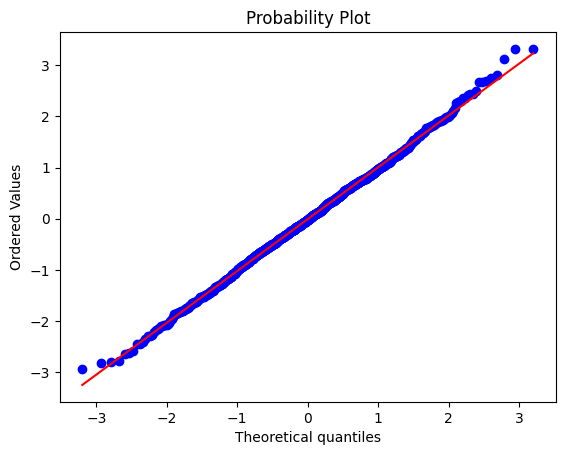

In [46]:
# However We can code all the above coding in one line
x=stats.probplot(data,plot=plt)